In [1]:
# Import the main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In this homework, we will use the Car price dataset like last week.
You can download it with wget

In [2]:
! wget -O data.csv https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-08 11:31:51--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  5.02MB/s    in 0.3s    

2023-10-08 11:31:52 (5.02 MB/s) - ‘data.csv’ saved [1475504/1475504]



We'll work with the MSRP variable, and we'll transform it to a classification task.

For the rest of the homework, you'll need to use only these columns:
- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg
- MSRP

In [3]:
file_name = 'data.csv'
data = pd.read_csv(file_name)

In [4]:
columns = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']

In [5]:
data = data[columns]

## Data preparation
- Keep only the columns above
- Lowercase the column names and replace spaces with underscores
- Fill the missing values with 0
- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1.

In [6]:
dict_columns = {}
for column in data.columns.to_numpy():
    dict_columns[column]=column.lower().replace(" ","_")
    
dict_columns

{'Make': 'make',
 'Model': 'model',
 'Year': 'year',
 'Engine HP': 'engine_hp',
 'Engine Cylinders': 'engine_cylinders',
 'Transmission Type': 'transmission_type',
 'Vehicle Style': 'vehicle_style',
 'highway MPG': 'highway_mpg',
 'city mpg': 'city_mpg',
 'MSRP': 'msrp'}

In [7]:
data.rename(columns=dict_columns,inplace=True)

In [8]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
data.fillna(0,inplace=True)

In [10]:
data['above_average'] = data['msrp'].map(lambda x: 1 if x > data.msrp.mean() else 0)

In [11]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data_train, data_val_test = train_test_split(data, train_size=0.6, test_size=0.4, random_state=1)
print('Data train shape: ',data_train.shape)

Data train shape:  (7148, 11)


In [14]:
data_val, data_test = train_test_split(data_val_test, train_size=0.5, test_size=0.5, random_state=1)
print('Data val shape: ',data_val.shape, ', data test shape: ', data_test.shape)

Data val shape:  (2383, 11) , data test shape:  (2383, 11)


In [15]:
Y_train = data_train.above_average.to_numpy()
Y_val = data_val.above_average.to_numpy()
Y_test = data_test.above_average.to_numpy()
data_X_train = data_train.drop(columns=['msrp','above_average'])
data_X_val = data_val.drop(columns=['msrp','above_average'])
data_X_test = data_test.drop(columns=['msrp','above_average'])

In [16]:
data_X_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [17]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
above_average          int64
dtype: object

In [18]:
# Get categorical features
categorical = data_X_train.columns[data_X_train.dtypes == 'object'].to_list()
# Get numeric features
numerical = data_X_train.columns[data_X_train.dtypes != 'object'].to_list()

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg

In [19]:
# Import roc_auc_score from module sklearn.metrics
from sklearn.metrics import roc_auc_score

In [20]:
for col_num in numerical:
    Y_score = data_train[col_num].to_numpy()
    Y_true = data_train.above_average.to_numpy()
    auc_value = roc_auc_score(y_true=Y_true, y_score=Y_score)
    if auc_value < 0.5:
        auc_value = roc_auc_score(y_true=Y_true, y_score=-Y_score)
    print('y_score:',col_num+',','y_true: above_average','-> auc_score:',auc_value)

y_score: year, y_true: above_average -> auc_score: 0.6943018002799936
y_score: engine_hp, y_true: above_average -> auc_score: 0.9159001518508375
y_score: engine_cylinders, y_true: above_average -> auc_score: 0.768274900593613
y_score: highway_mpg, y_true: above_average -> auc_score: 0.6333685399678282
y_score: city_mpg, y_true: above_average -> auc_score: 0.67232674562278


## Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
<code>
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
</code>
What's the AUC of this model on the validation dataset? (round to 3 digits)
- 0.678
- 0.779
- 0.878
- 0.979

In [21]:
#Import DictVectorizer and logistic regression from scikit-learn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [23]:
# Onehot encoding for X_train
dv = DictVectorizer(sparse=False)
dict_train = data_X_train[categorical+numerical].to_dict(orient='records')
X_train = dv.fit_transform(dict_train)
X_train.shape

(7148, 954)

In [24]:
# One hot encoding for X_val
dict_val = data_X_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(dict_val)
X_val.shape

(2383, 954)

In [25]:
# Fit model
model.fit(X=X_train,y=Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [26]:
# Prediction of X_val
Y_val_pred = model.predict_proba(X=X_val)[:,1]

In [27]:
Y_val_pred.shape

(2383,)

In [28]:
# Import roc_curve and auc from scikit-learn
from sklearn.metrics import roc_curve, auc

In [29]:
# Get fpr tpr and thresholds, 
fpr, tpr, thresholds = roc_curve(y_true=Y_val, y_score=Y_val_pred)

Text(0, 0.5, 'TPR')

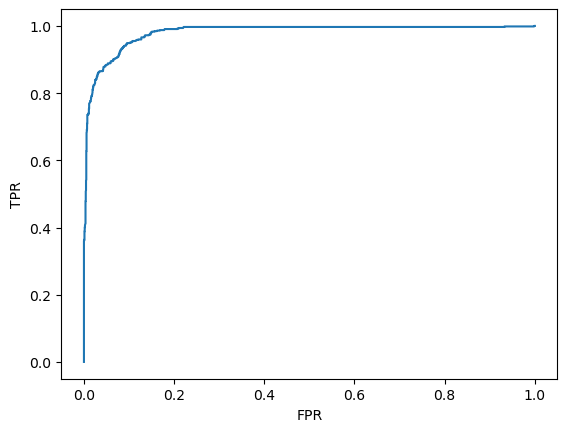

In [30]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [31]:
# get AUC score
auc_value = auc(x=fpr, y=tpr)
print('auc value:',auc_value)

auc value: 0.9799773104405838


In [32]:
# get AUC score by the function roc_auc_score
roc_auc_score(y_true=Y_val, y_score=Y_val_pred,)

0.9799773104405838

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:
<code>
    F_1 = 2*(P*R)/(P+R)
</code>

Where *P* is precision and *R* is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?
- 0.12
- 0.32
- 0.52
- 0.72

In [33]:
thresholds = np.arange(start=0., stop=1., step=.01)
F1_list = []

# get actual positive and negative
actual_positive = (Y_val == 1)
actual_negative = (Y_val == 0)
# fro each value of threshold
for threshold in thresholds:
    # get predict positive and negative
    predict_positive = (Y_val_pred >= threshold)
    predict_negative = (Y_val_pred < threshold)
    # get value of true positive
    tp = (predict_positive & actual_positive).sum()
    # get value of true negative
    tn = (predict_negative & actual_negative).sum()
    # get value of false positive
    fp = (predict_positive & actual_negative).sum()
    # get value of false negative
    fn = (predict_negative & actual_positive).sum()
    # get value of precision
    P = tp/(tp+fp)
    # get value of recall
    R = tp/(tp + fn)
    # get value of F1
    F1 = 2*(P*R)/(P+R)
    # save its
    F1_list.append(F1)
    
# get the threshold at which F1 is max
idx_max = F1_list.index(max(F1_list))
print('Max value of F1:',max(F1_list),'-> threshold:',thresholds[idx_max])

Max value of F1: 0.8841269841269841 -> threshold: 0.53


In [34]:
# Get such value in different way
from sklearn.metrics import f1_score
F1_list = []
# for each value of threshold
for threshold in thresholds:
    f1 = f1_score(y_true=Y_val, y_pred=(Y_val_pred>=threshold))
    F1_list.append(f1)
    
idx_max = F1_list.index(max(F1_list))
print('Max value of F1:',max(F1_list),'-> threshold:',thresholds[idx_max])

Max value of F1: 0.8841269841269841 -> threshold: 0.53


## Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?
- 0.003
- 0.030
- 0.090
- 0.140

In [35]:
# Definition of function for training model
def train_model(df, y_train):
    dict_train = df[categorical+numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dict_train)
    model = LogisticRegression(solver='liblinear',C=1.0,max_iter=1000)
    model.fit(X_train,y_train)
    return dv, model

In [36]:
# Definition of function for prediction by model
def predict(df, dv, model):
    dict_pred = df[categorical+numerical].to_dict(orient='records')
    X = dv.transform(dict_pred)
    Y_pred = model.predict_proba(X)[:,1]
    return Y_pred

In [37]:
# Import KFold from sklearn
from sklearn.model_selection import KFold

In [38]:
# install tqdm
!pip install tqdm

In [39]:
# import tqdm
from tqdm.auto import tqdm

In [40]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [41]:
# Initialize auc scores
auc_scores = []
# For each split
for train_idx, val_idx in tqdm(kf.split(data)):
    # Extract training set and validation set
    df_train, df_val = data.iloc[train_idx], data.iloc[val_idx]
    # Extract Y_train and Y_val
    Y_train, Y_val = df_train.above_average.values, df_val.above_average.values
    # Get a trained model
    dv, model = train_model(df_train, Y_train)
    # Predict output for validation set
    Y_pred = predict(df_val, dv, model)
    # Get auc score
    auc_score = roc_auc_score(y_true=Y_val, y_score=Y_pred)
    # save its
    auc_scores.append(auc_score)

0it [00:00, ?it/s]

In [42]:
# Print auc scores
auc_scores

[0.9795427375708988,
 0.9769811692065483,
 0.9745767154863396,
 0.978831386935841,
 0.9826476266141325]

In [43]:
# Compute the standard deviation of auc scores
std_auc_scores = np.std(auc_scores)
print('Standard Deviation of AUC scores:', std_auc_scores.round(3))

Standard Deviation of AUC scores: 0.003


## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C
- Iterate over the following C values: [0.01, 0.1, 0.5, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?
- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [44]:
# Re-definition of function train_model
def train_model(df, y_train, C=1.0):
    dict_train = df[categorical+numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dict_train)
    model = LogisticRegression(solver='liblinear',C=C,max_iter=1000)
    model.fit(X_train,y_train)
    return dv, model

In [45]:
# Defintion of C-values
Cs = [0.01, 0.1, 0.5, 10]
# Initialize means and stds of AUC
auc_means, auc_stds = [], []

# For each C-value
for C in Cs:
    # Initialize KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    # Initialize auc scores
    auc_scores = []
    # For each split of data
    for train_idx, val_idx in tqdm(kf.split(data)):
        # Extract training set and validation set
        df_train, df_val = data.iloc[train_idx], data.iloc[val_idx]
        # Extract Y_train and Y_val
        Y_train, Y_val = df_train.above_average.values, df_val.above_average.values
        # Get a trained model
        dv, model = train_model(df_train, Y_train, C)
        # Predict output for validation set
        Y_pred = predict(df_val, dv, model)
        # Get auc score
        auc_score = roc_auc_score(y_true=Y_val, y_score=Y_pred)
        # save its
        auc_scores.append(auc_score)
    # Compute mean of auc
    auc_mean = np.mean(auc_scores)
    # save its
    auc_means.append(auc_mean)
    # Compute std of auc
    auc_std = np.std(auc_scores)
    # save its
    auc_stds.append(auc_std)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [46]:
# Print C-value and mean and std of auc scores
print('C-value,','AUC-mean,','AUC-std')
for C, auc_mean, auc_std in zip(Cs, auc_means, auc_stds):
    print(f"{C}, {auc_mean.round(3)}, {auc_std.round(3)}")

C-value, AUC-mean, AUC-std
0.01, 0.954, 0.003
0.1, 0.972, 0.002
0.5, 0.978, 0.002
10, 0.98, 0.004


In [47]:
# print C-value of best auc mean value
best_mean_idx = auc_means.index(max(auc_means))
print('C-value of best mean score:', Cs[best_mean_idx])

C-value of best mean score: 10
